# **67818 Exercise 1 - Daniel Busbib**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from copy import deepcopy
import folium
from folium.plugins import HeatMap, MarkerCluster
import plotly.graph_objects as go
from geopy.geocoders import Nominatim

In [2]:
# take data from ex1.csv file
file_name = "ex1.csv"
if 'google.colab' in str(get_ipython()):
  import io
  from google.colab import files
  uploaded = files.upload()
  data = pd.read_csv(io.BytesIO(uploaded[file_name]))
else:
  data = pd.read_csv(file_name)

Saving ex1.csv to ex1.csv


# **Q1**


ׂׂ(a)


In [5]:
data.head()

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,...,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,0,137007,2016-07-23,Utah,Draper,12300 South,0,1,4.0,NaN,...,Man wanted for prior agg asault shot self in h...,0::30,0::Adult 18+,0::Male,0::Eddie Heuser,NaN,0::Injured,0::Subject-Suspect,51.0,11.0
1,1,49807,2014-12-13,-1,Chicago,10400 block of South State Street,-1,0,2.0,0::Unknown,...,"Man shot, drive-by;",0::26,0::Adult 18+,0::Male,0::Tyrece L. Stornes,NaN,0::Killed,0::Victim,28.0,14.0
2,2,2318,2014-01-15,south carolina,Irmo,1 Forest Walk Court,4,0,2.0,NaN,...,NaN,0::28||1::3||2::1||3::38,0::Adult 18+||1::Child 0-11||2::Child 0-11||3:...,0::Female||1::Male||2::Female||3::Male,0::Kia Miller||1::Kyler Devane Miller||2::Syra...,3::Family,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,73.0,19.0
3,3,237635,2018-03-18,-1,Detroit,5600 BLOCK OF JOHN C LODGE FWY,0,0,NaN,0::Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,238068,2018-03-21,Michigan,Benton Harbor,1200 block of Parkway Dr,0,0,6.0,0::Stolen,...,"raid, drug, stolen handgun",0::34||1::39||2::31||3::47,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male,0::Sylvester Davis III||1::Leonard Robinson||2...,NaN,"0::Unharmed, Arrested||1::Unharmed, Arrested||...",0::Subject-Suspect||1::Subject-Suspect||2::Sub...,79.0,21.0


* **Categorical features :**
city_or_contry, state, address, gun_stolen, congressional_district, gun_type, location_description, participant_age, participant_age_group, participant_name, participant_relationship, participant_gender, state_house_district, state_senate_district

* **Ordinal features:**
  n_killed, n_injured, n_guns_involved

  הם אורדינלים כיוון שיש משמעות לגודל שלהם, ככל שהערך גדול יותר כך רמת חומרת הפשע גדולה


* **Continuous features:** latitude, longitude.

  בגלל שיש להם טווח ערכים אינסופי

  גם התאריך יכול להיות משתנה רציף, כיוון שיש אינסוף תאריכים.


(b)


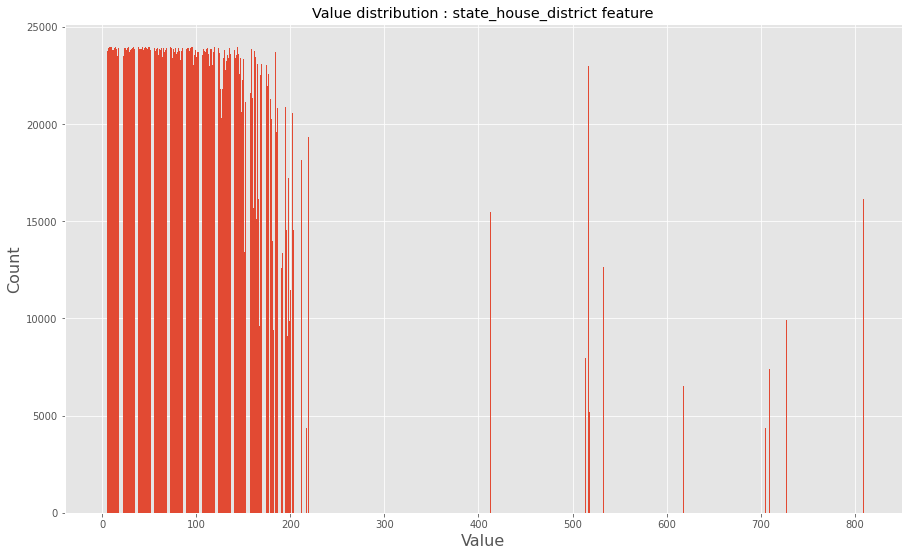

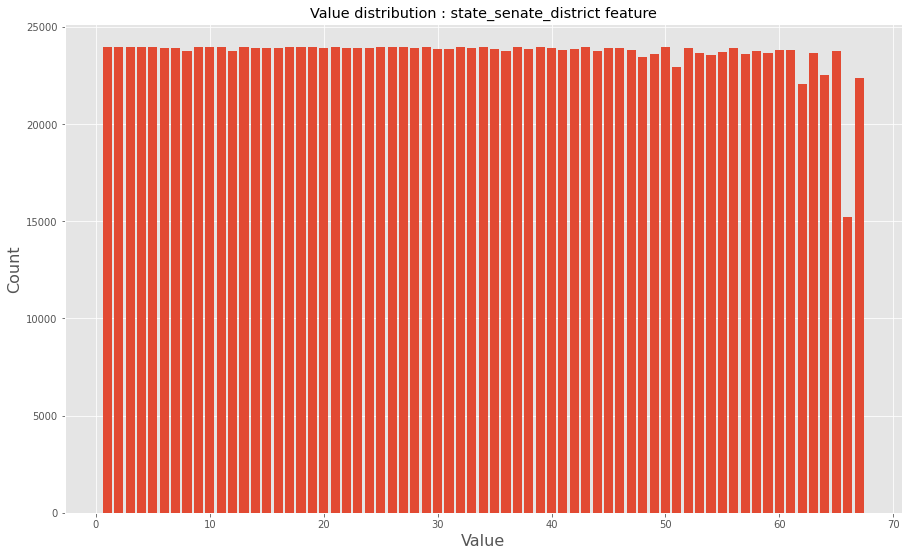

In [6]:
# plot categorial feature function
def plot_categorial(name=""):
  fig, ax = plt.subplots(figsize=(15, 9))
  plt.title(f"Value distribution : {name} feature")
  plt.xlabel("Value", fontsize = 16)
  plt.ylabel("Count", fontsize = 16)
  plt.bar(data[name].values, data[name].index)

plot_categorial("state_house_district")
plot_categorial("state_senate_district")


ניתן לראות שעבור המשתנה הראשון זה לא נראה שהערכים מתפלגים אחיד, לעומת זאת עבור המשתנה השני כן בקירוב

In [7]:
# unique values
data.nunique()

Unnamed: 0                  23967
incident_id                 23967
date                         1571
state                         103
city_or_county               4175
address                     21625
n_killed                       11
n_injured                      21
congressional_district         54
gun_stolen                    116
gun_type                      491
incident_characteristics     3705
latitude                    16038
location_description         3455
longitude                   20785
n_guns_involved                48
notes                       14739
participant_age              3452
participant_age_group         248
participant_gender            251
participant_name            11560
participant_relationship      106
participant_status            590
participant_type              115
state_house_district          213
state_senate_district          67
dtype: int64

* state_house_district: 213 unique values
* state_senate_district: 67 unique values

# Q2


(a)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                23967 non-null  int64  
 1   incident_id               23967 non-null  int64  
 2   date                      23967 non-null  object 
 3   state                     23967 non-null  object 
 4   city_or_county            23967 non-null  object 
 5   address                   22327 non-null  object 
 6   n_killed                  23967 non-null  int64  
 7   n_injured                 23967 non-null  int64  
 8   congressional_district    22780 non-null  float64
 9   gun_stolen                14015 non-null  object 
 10  gun_type                  14017 non-null  object 
 11  incident_characteristics  23938 non-null  object 
 12  latitude                  23338 non-null  object 
 13  location_description      4150 non-null   object 
 14  longit

לרוב המשתנים יש ערכי זבל כפי שניתן לראות.
חוץ מ:

incident_id, date, state, city_or_country,n_killed, n_injured

In [9]:
# fill all null values with the mode
data = data.fillna(data.mode().iloc[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                23967 non-null  int64  
 1   incident_id               23967 non-null  int64  
 2   date                      23967 non-null  object 
 3   state                     23967 non-null  object 
 4   city_or_county            23967 non-null  object 
 5   address                   23967 non-null  object 
 6   n_killed                  23967 non-null  int64  
 7   n_injured                 23967 non-null  int64  
 8   congressional_district    23967 non-null  float64
 9   gun_stolen                23967 non-null  object 
 10  gun_type                  23967 non-null  object 
 11  incident_characteristics  23967 non-null  object 
 12  latitude                  23967 non-null  object 
 13  location_description      23967 non-null  object 
 14  longit

ניתן לראות שאין ערכי 

NULL

(b)

In [10]:
data.describe()

,Unnamed: 0,incident_id,n_killed,n_injured,congressional_district,longitude,n_guns_involved,state_house_district,state_senate_district
count,23967.000000,23967.000000,23967.000000,23967.000000,23967.000000,23967.000000,23967.000000,23967.000000,23967.000000
mean,11983.000000,119972.784078,0.119039,-0.048525,7.652689,1935.306344,1.215922,48.037802,18.409772
std,6918.821287,69317.320224,0.549684,0.869873,8.333522,4017.817541,3.346817,42.263462,14.244044
min,0.000000,5.000000,-5.000000,-19.000000,0.000000,-163.718000,1.000000,1.000000,1.000000
25%,5991.500000,59805.000000,0.000000,0.000000,2.000000,-90.069100,1.000000,10.000000,5.000000
50%,11983.000000,120433.000000,0.000000,0.000000,5.000000,-81.723600,1.000000,35.000000,15.000000
75%,17974.500000,179866.000000,0.000000,0.000000,10.000000,-73.864300,1.000000,77.000000,29.000000
max,23966.000000,239656.000000,5.000000,14.000000,53.000000,10097.433100,346.000000,809.000000,67.000000


**בעיות**
1. 
ניתן לראות שיש ערכים שליליים ב:

  n_killed.

  מה שכמובן לא הגיוני.

2. אותה הבעיה מסעיף קודם בעמודה
  
  n_injured

3. טווח ערכי
  
  longitude

  הוא בין -180 ל-180 ואילו לפי התיאור הערך המקסימלי הוא 9900 והמינימום -9900 בערך.
  שכנראה זו טעות בהקלדה, ולכן אחלק ב100 כדי להישאר בטווח.

4. במקרה ש1,2 נחשב אותו דבר מוסיף עוד בעיה:
  יש מדינות עם הערך -1 שהתקבלו מהחלפת ערך הזבל בעמודה הנ"ל.
  לכן נחליף ערך זה בערך השני הכי נפוץ שעמודה של המדינה.


In [11]:
# 1-2 negative values problem
data["n_killed"] = data["n_killed"].abs()
data["n_injured"] = data["n_injured"].abs()

# 3
data.update(data.loc[180 < data["longitude"]]["longitude"]/100)
data.update(data.loc[-180 > data["longitude"]]["longitude"]/100)

data.describe()

#4
state = data["state"]
st = state[state != "-1"].mode()[0]
data["state"].replace(to_replace="-1", value=st, inplace=True)

In [12]:
# data after fixes
data.describe()

,Unnamed: 0,incident_id,n_killed,n_injured,congressional_district,longitude,n_guns_involved,state_house_district,state_senate_district
count,23967.000000,23967.000000,23967.000000,23967.000000,23967.000000,23967.000000,23967.000000,23967.000000,23967.000000
mean,11983.000000,119972.784078,0.251387,0.493053,7.652689,-50.626295,1.215922,48.037802,18.409772
std,6918.821287,69317.320224,0.503115,0.718277,8.333522,76.482418,3.346817,42.263462,14.244044
min,0.000000,5.000000,0.000000,0.000000,0.000000,-163.718000,1.000000,1.000000,1.000000
25%,5991.500000,59805.000000,0.000000,0.000000,2.000000,-90.069100,1.000000,10.000000,5.000000
50%,11983.000000,120433.000000,0.000000,0.000000,5.000000,-81.723600,1.000000,35.000000,15.000000
75%,17974.500000,179866.000000,0.000000,1.000000,10.000000,-73.864300,1.000000,77.000000,29.000000
max,23966.000000,239656.000000,5.000000,19.000000,53.000000,100.974331,346.000000,809.000000,67.000000


# Q3

(a)

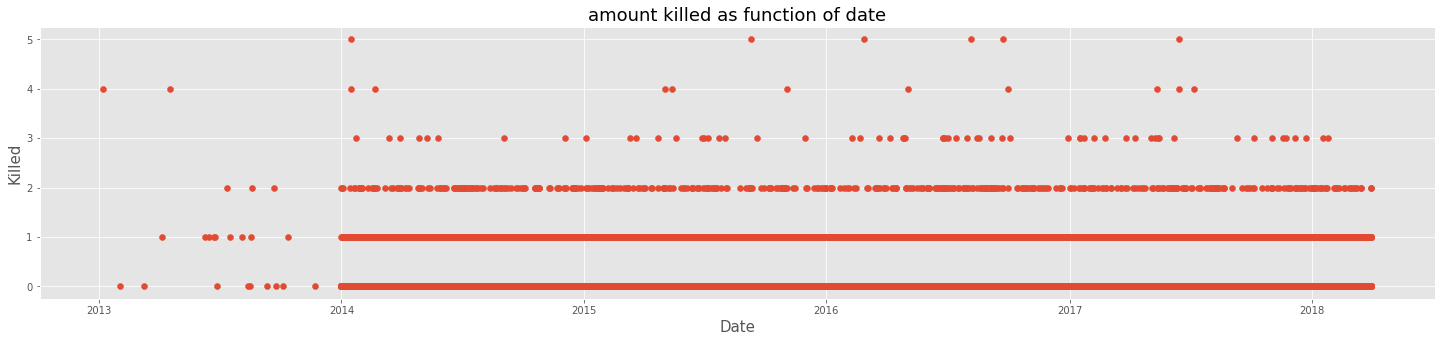

In [13]:
data["date"] = pd.to_datetime(data["date"])
data.sort_values("date", inplace=True)

# killed by time plot
plt.figure(figsize=(25,5))
plt.scatter(data["date"], data["n_killed"])
plt.xlabel("Date", fontsize=15)
plt.ylabel("Killed", fontsize=15)
plt.title(f"amount killed as function of date", fontsize=18)
plt.show()

`n_killed` 

הוא המשתנה שבחרתי כאינדיקטור לחומרת הפשע, כיוון שלדעתי הוא המשתנה שמצביע הכי הרבה על כמה הפשע היה חמור

מהגרף,אני רואה שאין בהכרח מגמה נראית לפי התאריך, אך כן יש עלייה מתונה בחומרת הפשע בהתחלה

(b)

In [14]:
# first - map visualization of crime
data = data.loc[data["latitude"] != ""]
data = data.loc[data["latitude"] != "its pretty far there, man"]
data["latitude"] = data["latitude"].astype(float)
data["longitude"] = data["longitude"].astype(float)

map = folium.Map(location=[37.6000, -95.6650], zoom_start = 4, tiles='openstreetmap')

folium.plugins.HeatMap(list(zip(data['latitude'], data['longitude']))).add_to(map)
map

מהסתכלות על המפה בארצות הברית ניתן לראות שיש יותר פשעים בצד הימני(EASTERN).

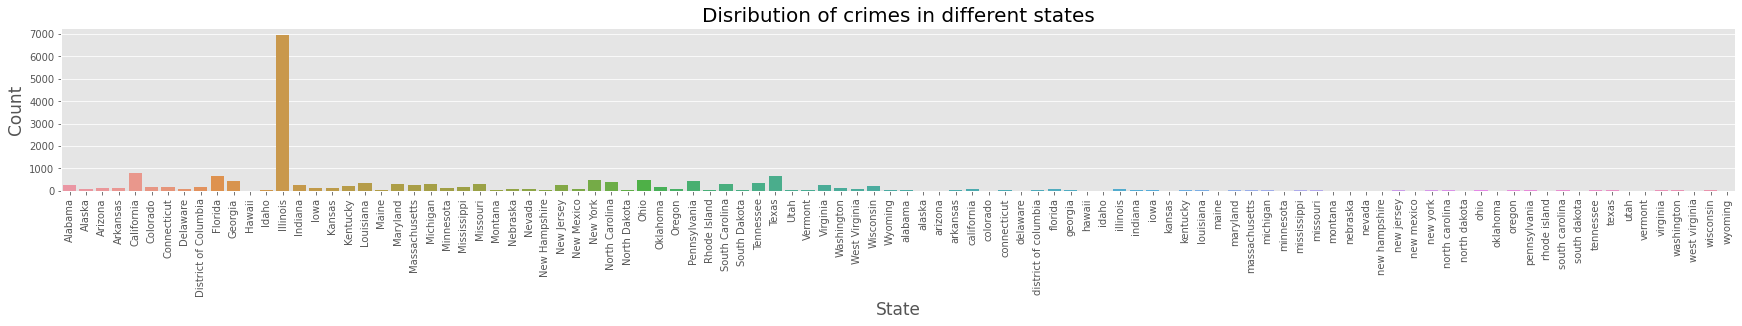

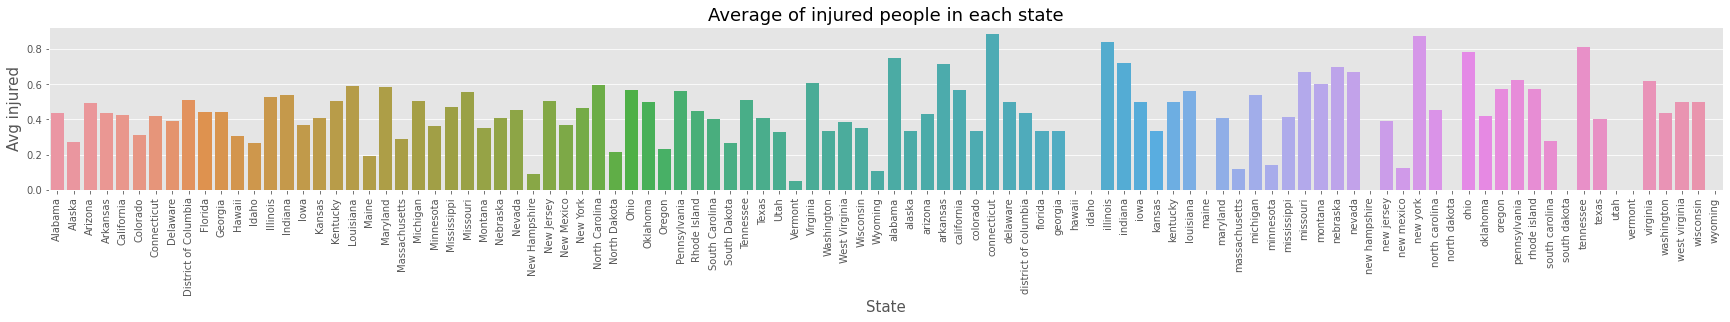

In [16]:
# plot count crimes as function of states
plt.figure(figsize=(30,3))
sns.countplot(x=data["state"], order=np.sort(data["state"].unique()))
plt.xticks(rotation = 90)
plt.xlabel("State", fontsize=17)
plt.ylabel("Count", fontsize=17)
plt.title(f"Disribution of crimes in different states", fontsize=20)
plt.show()

# plot AVG INJURED people by state
plt.figure(figsize=(30, 3))
by_state = data.groupby("state").mean()
sns.barplot(data=by_state, x=by_state.index, y="n_injured", order=np.sort(data["state"].unique()))
plt.xticks(rotation = 90)
plt.xlabel("State", fontsize=15)
plt.ylabel("Avg injured", fontsize=15)
plt.title(f"Average of injured people in each state", fontsize=18)
plt.show()

מהסתכלות על שני הגרפים אני רואה שהקשר במדינות משתנה.

לדוגמה עבור מדינת טקסס שבה יש יחסית הרבה פשעים אך היחס הוא קטן יחסית בממוצע.
<br><br>

בחרתי במשתנה

`state`

כאינדיקטור למיקום.יתרון אחד הוא שמספר הערכים הוא סביר שמאפשר להראות בגרף עמודות ולנתח

חיסרון בשימוש זה הוא שאין התייחסות לגודל של כל מדינה בפועל, שזה כן מייצר הטיה עבור מדינות גדולות יותר מבחינת אוכלוסיה.
